In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import numpy as np
sys.path.append('/Users/rubybyrne/rlb_MWA/sky_imaging')
import plot_fits
import plot_healpix_map
import healpix_utils
import scipy.io

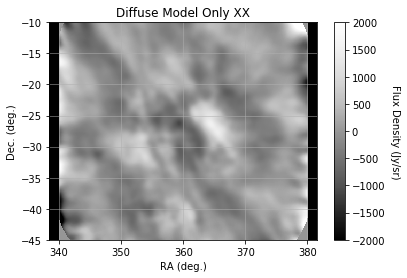

In [2]:
plt.figure(figsize=(10,10))
diffuse_model = plot_fits.load_image(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_diffuse_Feb2019/output_data/1061316296_uniform_Model_XX.fits'
)
plot_fits.plot_fits_image(diffuse_model, ra_range=[340,380],dec_range=[-45,-10],colorbar_label='Flux Density (Jy/sr)',title='Diffuse Model Only XX',colorbar_range=[-2000,2000])

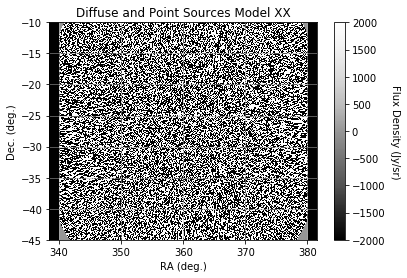

In [3]:
plt.figure(figsize=(10,10))
pt_sources_and_diffuse = plot_fits.load_image(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_GLEAM_and_diffuse_Feb2019/output_data/1061316296_uniform_Model_XX.fits'
)
plot_fits.plot_fits_image(pt_sources_and_diffuse, ra_range=[340,380],dec_range=[-45,-10],colorbar_label='Flux Density (Jy/sr)',title='Diffuse and Point Sources Model XX',colorbar_range=[-2000,2000])

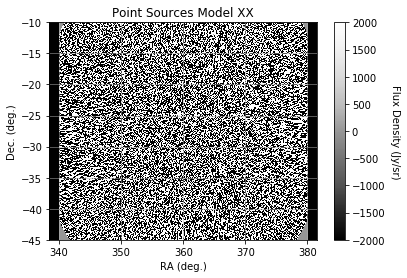

In [4]:
plt.figure(figsize=(10,10))
pt_sources_model = plot_fits.load_image(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_GLEAM_Feb2019/output_data/1061316296_uniform_Model_XX.fits'
)
plot_fits.plot_fits_image(pt_sources_model, ra_range=[340,380],dec_range=[-45,-10],colorbar_label='Flux Density (Jy/sr)',title='Point Sources Model XX',colorbar_range=[-2000,2000])

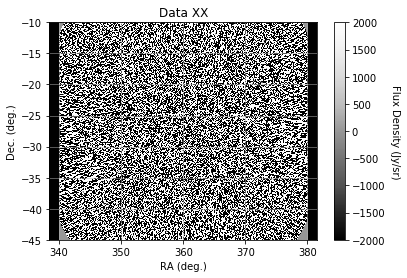

In [5]:
plt.figure(figsize=(10,10))
data = plot_fits.load_image(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_diffuse_Feb2019/output_data/1061316296_uniform_Dirty_XX.fits'
)
plot_fits.plot_fits_image(data, ra_range=[340,380],dec_range=[-45,-10],colorbar_label='Flux Density (Jy/sr)',title='Data XX',colorbar_range=[-2000,2000])

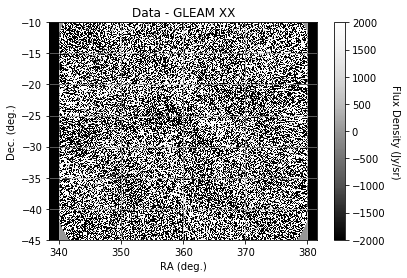

In [6]:
data_diffuse = plot_fits.difference_images(data,pt_sources_model)
plot_fits.plot_fits_image(data_diffuse, ra_range=[340,380],dec_range=[-45,-10],colorbar_label='Flux Density (Jy/sr)',title='Data - GLEAM XX',colorbar_range=[-2000,2000])

In [37]:
#Import UV maps
uv_diffuse_model_xx = np.array(scipy.io.readsav(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_diffuse_Feb2019/grid_data/1061316296_uv_model_XX.sav'
)['grid_uv_model']).T
uv_GLEAM_and_diffuse_xx = np.array(scipy.io.readsav(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_GLEAM_and_diffuse_Feb2019/grid_data/1061316296_uv_model_XX.sav'
)['grid_uv_model']).T
uv_GLEAM_model_xx = np.array(scipy.io.readsav(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_GLEAM_Feb2019/grid_data/1061316296_uv_model_XX.sav'
)['grid_uv_model']).T
uv_data_xx = np.array(scipy.io.readsav(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_diffuse_Feb2019/grid_data/1061316296_uv_XX.sav'
)['grid_uv']).T
uv_diffuse_optimal_weighting_xx = np.array(scipy.io.readsav(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_diffuse_optimal_weighting_Mar2020/grid_data/1061316296_uv_model_XX.sav'
)['grid_uv_model']).T
uv_GLEAM_and_diffuse_optimal_weighting_xx = np.array(scipy.io.readsav(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_GLEAM_and_diffuse_optimal_weighting_Mar2020/grid_data/1061316296_uv_model_XX.sav'
)['grid_uv_model']).T
uv_data_optimal_weighting_xx = np.array(scipy.io.readsav(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_diffuse_optimal_weighting_Mar2020/grid_data/1061316296_uv_XX.sav'
)['grid_uv']).T
uv_diffuse_roundtrip_xx = np.array(scipy.io.readsav(
    '/Volumes/Bilbo/rlb_fhd_outputs/fhd_bug_testing_Feb2020/fhd_rlb_subtract_diffuse_roundtrip_test_Mar2020/grid_data/1061316296_uv_model_XX.sav'
)['grid_uv_model']).T

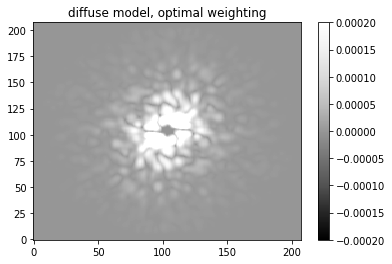

In [26]:
plot_array = np.abs(uv_diffuse_optimal_weighting_xx)
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=-.0002, vmax=.0002, aspect='auto'
)
plt.title('diffuse model, optimal weighting')
cbar = plt.colorbar()

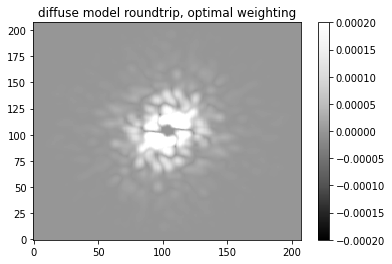

In [38]:
plot_array = np.abs(uv_diffuse_roundtrip_xx)
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=-.0002, vmax=.0002, aspect='auto'
)
plt.title('diffuse model roundtrip, optimal weighting')
cbar = plt.colorbar()

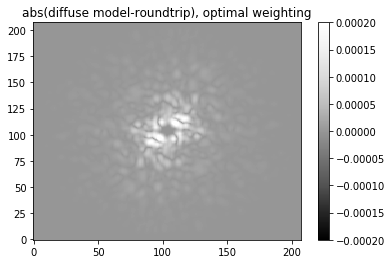

In [40]:
plot_array = np.abs(uv_diffuse_optimal_weighting_xx-uv_diffuse_roundtrip_xx)
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=-.0002, vmax=.0002, aspect='auto'
)
plt.title('abs(diffuse model-roundtrip), optimal weighting')
cbar = plt.colorbar()

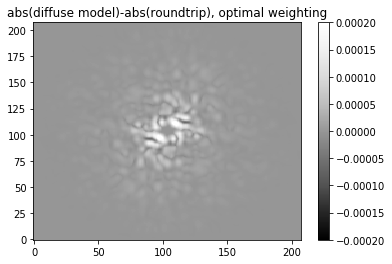

In [41]:
plot_array = np.abs(uv_diffuse_optimal_weighting_xx)-np.abs(uv_diffuse_roundtrip_xx)
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=-.0002, vmax=.0002, aspect='auto'
)
plt.title('abs(diffuse model)-abs(roundtrip), optimal weighting')
cbar = plt.colorbar()

/Users/rubybyrne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/Users/rubybyrne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


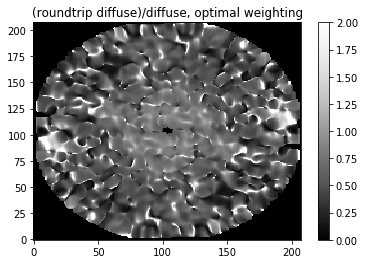

0.5437464
0.67970645


In [49]:
plot_array = np.abs(uv_diffuse_roundtrip_xx)/np.abs(uv_diffuse_optimal_weighting_xx)
plot_array[np.where(uv_diffuse_optimal_weighting_xx ==0)]=0
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=2, aspect='auto'
)
plt.title('(roundtrip diffuse)/diffuse, optimal weighting')
cbar = plt.colorbar()
plt.show()
print np.mean(plot_array)
print np.mean(plot_array[np.where(plot_array != 0)])

/Users/rubybyrne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/Users/rubybyrne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


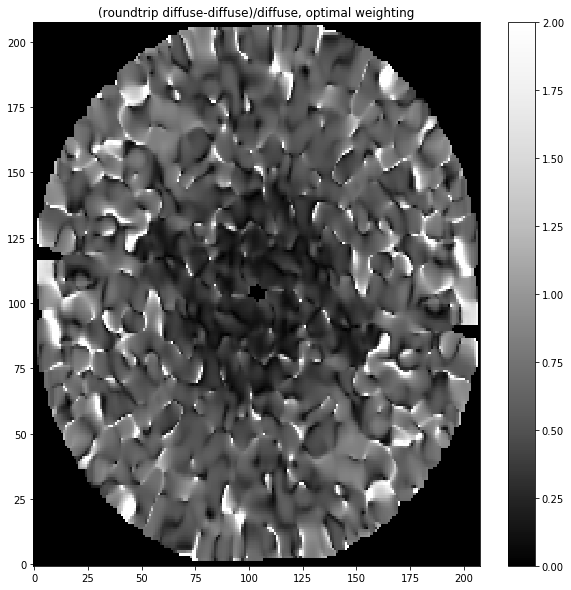

0.5208973
0.65114427


In [55]:
plot_array = np.abs(uv_diffuse_roundtrip_xx-uv_diffuse_optimal_weighting_xx)/np.abs(uv_diffuse_optimal_weighting_xx)
plot_array[np.where(uv_diffuse_optimal_weighting_xx ==0)]=0
plt.figure(figsize=(10,10))
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=2, aspect='auto'
)
plt.title('(roundtrip diffuse-diffuse)/diffuse, optimal weighting')
cbar = plt.colorbar()
plt.show()
print np.mean(plot_array)
print np.mean(plot_array[np.where(plot_array != 0)])

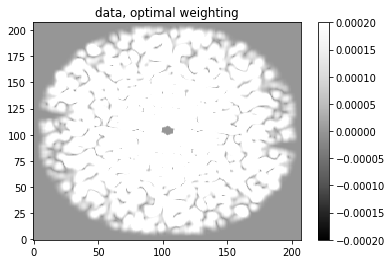

In [25]:
plot_array = np.abs(uv_data_optimal_weighting_xx)
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=-.0002, vmax=.0002, aspect='auto'
)
plt.title('data, optimal weighting')
cbar = plt.colorbar()

/Users/rubybyrne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/Users/rubybyrne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


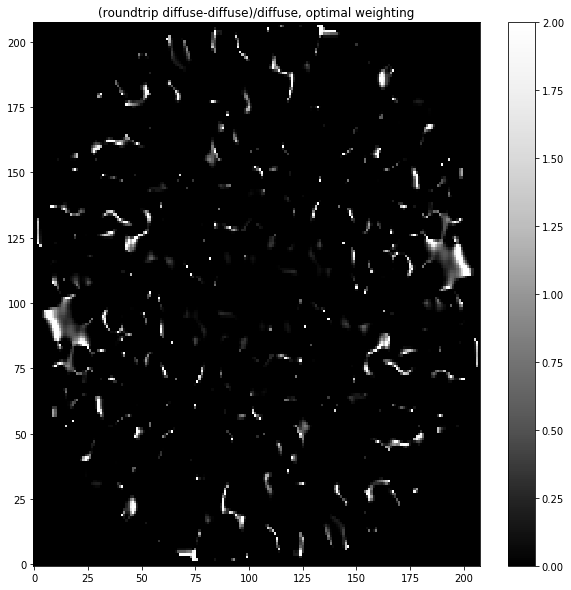

-0.25622588
-0.32029346


In [57]:
plot_array = (np.abs(uv_diffuse_roundtrip_xx)-np.abs(uv_diffuse_optimal_weighting_xx))/np.abs(uv_diffuse_optimal_weighting_xx)
plot_array[np.where(uv_diffuse_optimal_weighting_xx ==0)]=0
plt.figure(figsize=(10,10))
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=0, vmax=2, aspect='auto'
)
plt.title('(roundtrip diffuse-diffuse)/diffuse, optimal weighting')
cbar = plt.colorbar()
plt.show()
print np.mean(plot_array)
print np.mean(plot_array[np.where(plot_array != 0)])

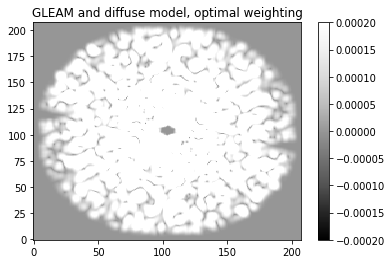

In [24]:
plot_array = np.abs(uv_GLEAM_and_diffuse_optimal_weighting_xx)
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=-.0002, vmax=.0002, aspect='auto'
)
plt.title('GLEAM and diffuse model, optimal weighting')
cbar = plt.colorbar()

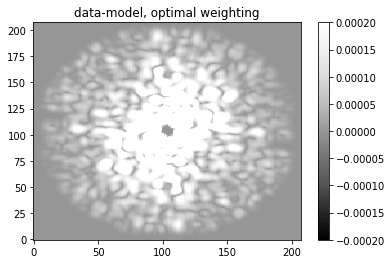

In [27]:
data_minus_model = np.abs(uv_data_optimal_weighting_xx-uv_GLEAM_and_diffuse_optimal_weighting_xx)
plt.imshow(
    data_minus_model, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=-.0002, vmax=.0002, aspect='auto'
)
plt.title('data-model, optimal weighting')
cbar = plt.colorbar()

/Users/rubybyrne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/Users/rubybyrne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


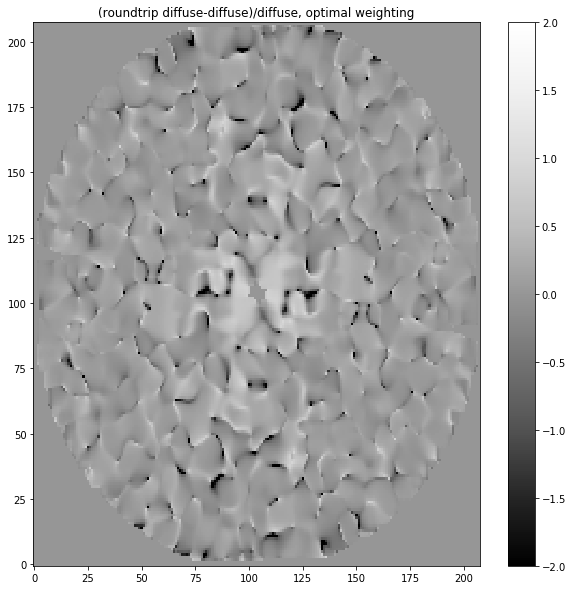

0.037385583
0.0467336


In [60]:
plot_array = (np.abs(uv_data_optimal_weighting_xx-uv_GLEAM)-np.abs(uv_GLEAM_and_diffuse_optimal_weighting_xx))/np.abs(uv_data_optimal_weighting_xx)
plot_array[np.where(uv_diffuse_optimal_weighting_xx ==0)]=0
plt.figure(figsize=(10,10))
plt.imshow(
    plot_array, origin='lower', interpolation='none',
    cmap='Greys_r',
    vmin=-2, vmax=2, aspect='auto'
)
plt.title('(roundtrip diffuse-diffuse)/diffuse, optimal weighting')
cbar = plt.colorbar()
plt.show()
print np.mean(plot_array)
print np.mean(plot_array[np.where(plot_array != 0)])